Net(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.9426],
        [-0.3065],
        [ 0.5019],
        [ 0.2725],
        [-0.3646],
        [ 0.2169],
        [ 0.6076],
        [-0.2988],
        [ 0.1627],
        [ 0.9823]], requires_grad=True), Parameter containing:
tensor([-0.2324, -0.8709, -0.7631,  0.5327, -0.2991, -0.4481, -0.5027,  0.8272,
        -0.5773, -0.8056], requires_grad=True), Parameter containing:
tensor([[-0.0912,  0.1117, -0.1658, -0.1751, -0.1792,  0.2815, -0.2596,  0.2316,
          0.0696, -0.2487],
        [ 0.2531,  0.1104, -0.1918, -0.2661,  0.0567, -0.0974,  0.2065, -0.1452,
          0.0909, -0.0657],
        [-0.0840,  0.2465,  0.2623,  0.3084, -0.0242,  0.0643,  0.2055,  0.2011,
          0.2268, -0.2230],
        [ 0.0288,  0.2120, -0.0362, -0.3040,  0.1337, -0.1778,  0.1958,  0.0138,
  

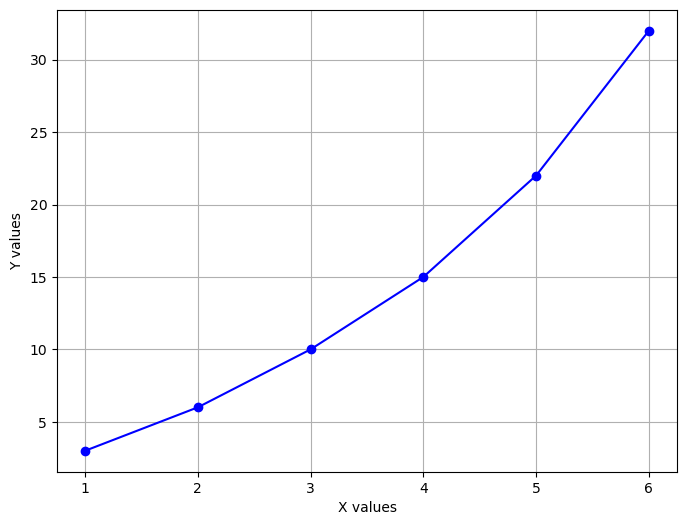

In [1]:
### Training with fancier version ###

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module): ## nn.Module class is used
    def __init__(self):
        super(Net, self).__init__()
        # Added more layer for better feature extraction
        # Layer size not too large because data size is not very large
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 1)

    def forward(self, x):
        # Used tanh because it performs best
        # Doesn't use activation at last layer for accurate output
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

print(net)
print(list(net.parameters())) # parameters are randomized


#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()

# Used Adam optimizer
# optimizer = optim.SGD(net.parameters(), lr=0.1)
optimizer = optim.Adam(net.parameters(), lr=0.01)


data = [(1.0,3.0), (2.0,6.0), (3.0,10.0), (4.0,15.0), (5.0,22.0), (6.0,32.0)]

# Split data into x and y
x_values, y_values = zip(*data)


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

In [2]:
# Used 5000 epoches
for epoch in range(5000): 
    for i, current_data in enumerate(data):
        X, Y = current_data
        X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])
        optimizer.zero_grad()   
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()    ## This line is equivalent to "W = W - lr* W.grad"
    print("Epoch {} - loss: {}".format(epoch, loss))


### Test the trained network ###            
for i, current_data in enumerate(data):
    X, Y = current_data
    X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])  
    out = net(torch.FloatTensor(X))  
    print("when x = {}, y = {}".format(X, out))
    

Epoch 0 - loss: 1007.15478515625
Epoch 1 - loss: 979.6068725585938
Epoch 2 - loss: 957.5078735351562
Epoch 3 - loss: 936.1093139648438
Epoch 4 - loss: 914.3672485351562
Epoch 5 - loss: 892.906005859375
Epoch 6 - loss: 872.4649658203125
Epoch 7 - loss: 853.0147705078125
Epoch 8 - loss: 834.4260864257812
Epoch 9 - loss: 816.62451171875
Epoch 10 - loss: 799.5560913085938
Epoch 11 - loss: 783.1709594726562
Epoch 12 - loss: 767.4219970703125
Epoch 13 - loss: 752.265869140625
Epoch 14 - loss: 737.6635131835938
Epoch 15 - loss: 723.5807495117188
Epoch 16 - loss: 709.9873657226562
Epoch 17 - loss: 696.85693359375
Epoch 18 - loss: 684.1659545898438
Epoch 19 - loss: 671.8937377929688
Epoch 20 - loss: 660.0214233398438
Epoch 21 - loss: 648.5321044921875
Epoch 22 - loss: 637.4100341796875
Epoch 23 - loss: 626.6409912109375
Epoch 24 - loss: 616.2115478515625
Epoch 25 - loss: 606.1089477539062
Epoch 26 - loss: 596.3211059570312
Epoch 27 - loss: 586.8363037109375
Epoch 28 - loss: 577.6431884765625
Ep

In [3]:
X

tensor([6.])

In [4]:
for epoch in range(20):
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [5]:
W = torch.tensor([1.0], requires_grad=True)
W = W*2
label = 1.0
loss = W*5 - label 
loss.backward()
W.grad

/tmp/ipykernel_30895/353321738.py:6: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  W.grad
